# Olivine-Liquid Hygrometry
- This workbook shows how to perform calculations for Olivine-Liquid hygrometry
- You can download the Excel spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Liquid_Ol_Liq_Themometry/Liquid_only_Thermometry.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

In [2]:
# Loading various python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

In [3]:
# Setting plotting parameters
# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Step 1 - load data

In [4]:
out=pt.import_excel('Liquid_only_Thermometry.xlsx', sheet_name="Ol-Liq")
my_input=out['my_input']
myLiquids1=out['Liqs']
myOls1=out['Ols']
display(myOls1.head())
display(myLiquids1.head())

,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,Cr2O3_Ol,NiO_Ol,Sample_ID_Ol
0,40.5,0.02,0.08,12.40,0.17,47.4,0.30,0.0,0,0.03,0.0,0
1,41.3,0.03,0.11,9.59,0.14,50.2,0.31,0.0,0,0.00,0.0,1
2,39.7,0.05,0.11,15.60,0.18,44.5,0.31,0.0,0,0.03,0.0,2
3,40.5,0.05,0.10,13.20,0.18,46.8,0.29,0.0,0,0.02,0.0,3
4,40.5,0.00,0.10,9.41,0.10,49.3,0.31,0.0,0,0.00,0.0,4


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,57.023602,0.623106,16.332899,4.36174,0.103851,4.19180,6.94858,3.59702,0.896895,0.000000,0.226584,5.59,0.2,0.0,0.0,0.0,0
1,57.658600,0.654150,17.194799,3.90621,0.084105,2.86892,5.91538,3.85948,1.018600,0.000000,0.214935,6.55,0.2,0.0,0.0,0.0,1
2,60.731201,0.862054,17.144199,4.07781,0.077488,2.50867,5.22075,4.45556,1.414160,0.000000,0.319638,3.14,0.2,0.0,0.0,0.0,2
3,61.532799,0.440860,16.508801,3.32990,0.037520,1.64150,4.34294,4.40860,1.407000,0.000000,0.215740,6.20,0.2,0.0,0.0,0.0,3
4,52.969101,0.803412,17.563000,5.93217,0.149472,3.78351,7.65110,3.80219,0.551178,0.037368,0.196182,6.58,0.2,0.0,0.0,0.0,4


## Example 1 - Simple calculation for just the H2O content of the liquid
- outputs just the wt% H2O in the liquid, using the hygrometer of Gavrilenko et al. (2016)

In [5]:
H2O_Calc_Thermobar=pt.calculate_ol_liq_hygr(liq_comps=myLiquids1, ol_comps=myOls1, 
                                               equationH="H_Gavr2016")
H2O_Calc_Thermobar

0    2.030582
1    1.364482
2    0.344844
3   -0.344697
4    2.860205
5    1.508569
6   -1.769123
7    1.909273
8    0.834843
9    2.860872
dtype: float64

## Example 2 - Melt matching
- in reality, you may not have olivine-liquid pairs that you know are in equilibrium. 
- Instead, you can feed in all measured olivines and liquids, and it will pair up all possible matches
- For the equilibrium tests, if you want to use Toplis, you need a temperature
- In this example, we use a constant temperature

In [6]:
H2O_Calc_Thermobar=pt.calculate_ol_liq_hygr_matching(liq_comps=myLiquids1, ol_comps=myOls1, 
                                               equationH="H_Gavr2016", eq_tests=True,
                                                    T=1300)
H2O_Calc_Thermobar.head()

Considering N=10 Ol & N=10 Liqs, which is a total of N=100 Liq- Ol pairs, be patient if this is >>1 million!
You have not selected a pressure, so we have calculated Toplis Kd at 1kbar


,H2O_calc,Temp used for calcs,P used for calcs,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)",SiO2_Liq,TiO2_Liq,...,ID_Ol,Si_Ol_cat_frac,Mg_Ol_cat_frac,Fet_Ol_cat_frac,Ca_Ol_cat_frac,Al_Ol_cat_frac,Na_Ol_cat_frac,K_Ol_cat_frac,Mn_Ol_cat_frac,Ti_Ol_cat_frac
0,2.030582,1300,1,0.314264,0.326180,-0.011916,0.014264,-0.025736,57.023602,0.623106,...,0.0,0.331677,0.578691,0.084925,0.002632,0.000772,0.0,0.0,0.001179,0.000123
1,1.682297,1300,1,0.240169,0.327530,-0.087362,-0.059831,-0.099831,57.658600,0.654150,...,0.0,0.331677,0.578691,0.084925,0.002632,0.000772,0.0,0.0,0.001179,0.000123
2,0.704945,1300,1,0.201173,0.308546,-0.107373,-0.098827,-0.138827,60.731201,0.862054,...,0.0,0.331677,0.578691,0.084925,0.002632,0.000772,0.0,0.0,0.001179,0.000123
3,-0.777583,1300,1,0.161199,0.312636,-0.151436,-0.138801,-0.178801,61.532799,0.440860,...,0.0,0.331677,0.578691,0.084925,0.002632,0.000772,0.0,0.0,0.001179,0.000123
4,3.105922,1300,1,0.208562,0.334102,-0.125540,-0.091438,-0.131438,52.969101,0.803412,...,0.0,0.331677,0.578691,0.084925,0.002632,0.000772,0.0,0.0,0.001179,0.000123


## We can also specify an olivine-liquid thermometer
- The hygrometer isn't T sensitive, so once we have a H2O estimate, we can plug that into a liquid-olivine thermometer. That gives us a temp for solving equilibrium at

In [7]:
H2O_Calc_Teq22=pt.calculate_ol_liq_hygr_matching(liq_comps=myLiquids1, ol_comps=myOls1, 
                                               equationH="H_Gavr2016",  equationT='T_Put2008_eq22',
                                                 eq_tests=True, P=5,
                                                    T=1300)
H2O_Calc_Teq22.head()

Considering N=10 Ol & N=10 Liqs, which is a total of N=100 Liq- Ol pairs, be patient if this is >>1 million!


,H2O_calc,T_K_calc,P used for calcs,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)",SiO2_Liq,TiO2_Liq,...,Al_Ol_cat_frac,Na_Ol_cat_frac,K_Ol_cat_frac,Mn_Ol_cat_frac,Ti_Ol_cat_frac,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
0,2.030582,1306.094822,5,0.314264,0.331693,-0.017429,0.014264,-0.025736,57.023602,0.623106,...,0.000772,0.0,0.0,0.001179,0.000123,9.490384,0.170076,0.556427,-0.760264,9.813745
1,1.682297,1246.358585,5,0.240169,0.320346,-0.080177,-0.059831,-0.099831,57.658600,0.654150,...,0.000772,0.0,0.0,0.001179,0.000123,13.711088,0.137693,0.568999,-0.815019,10.226597
2,0.704945,1278.487099,5,0.201173,0.308304,-0.107131,-0.098827,-0.138827,60.731201,0.862054,...,0.000772,0.0,0.0,0.001179,0.000123,16.264149,0.121869,0.577797,-0.790522,10.330149
3,-0.777583,1196.823888,5,0.161199,0.295190,-0.133991,-0.138801,-0.178801,61.532799,0.440860,...,0.000772,0.0,0.0,0.001179,0.000123,24.065168,0.097450,0.604665,-0.765547,10.732471
4,3.105922,1265.970449,5,0.208562,0.331112,-0.122550,-0.091438,-0.131438,52.969101,0.803412,...,0.000772,0.0,0.0,0.001179,0.000123,10.410636,0.186517,0.522022,-0.840343,10.135819


## Example 2b- Filtering these matches
- This is all Ol-Liq matches, you probably want to filter based on your choice of Kd filter
- First, lets plot up these equilibrium tests

Text(0.5, 0, 'ΔKd, Matzen (M-P)')

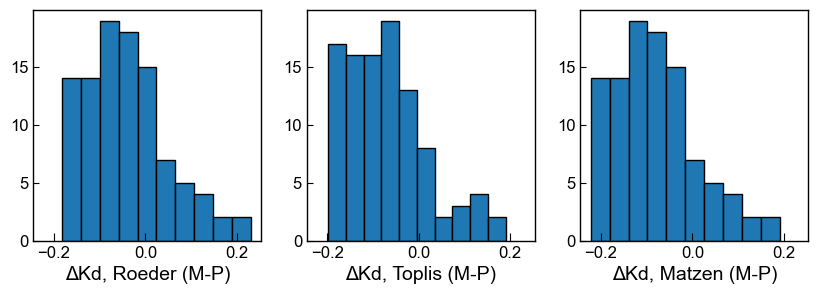

In [9]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize = (10,3), sharex=True) # adjust dimensions 
ax1.hist(H2O_Calc_Teq22['ΔKd, Roeder (M-P)'], ec='k')
ax2.hist(H2O_Calc_Teq22['ΔKd, Toplis (M-P)'], ec='k')
ax3.hist(H2O_Calc_Teq22['ΔKd, Matzen (M-P)'], ec='k')

ax1.set_xlabel('ΔKd, Roeder (M-P)')
ax2.set_xlabel('ΔKd, Toplis (M-P)')
ax3.set_xlabel('ΔKd, Matzen (M-P)')


### Now we can filter out based on common values

In [10]:
H2O_Calc_Teq22_FiltRoedder=H2O_Calc_Teq22.loc[H2O_Calc_Teq22['ΔKd, Roeder (M-P)'].between(-0.03, 0.03)]
H2O_Calc_Teq22_FiltToplis=H2O_Calc_Teq22.loc[H2O_Calc_Teq22['ΔKd, Toplis (M-P)'].between(-0.03, 0.03)]
H2O_Calc_Teq22_FiltMatzen=H2O_Calc_Teq22.loc[H2O_Calc_Teq22['ΔKd, Matzen (M-P)'].between(-0.03, 0.03)]

## Now we can plot up values for this

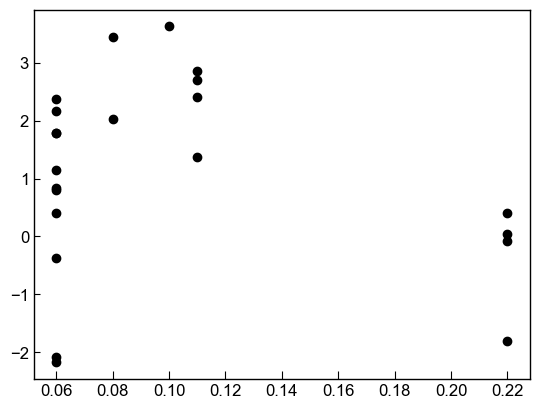

In [11]:
plt.plot(H2O_Calc_Teq22_FiltRoedder['Al2O3_Ol'], H2O_Calc_Teq22_FiltRoedder['H2O_calc'], 'ok')

In [12]:
H2O_Calc_Thermobar=pt.calculate_ol_liq_hygr_matching(liq_comps=myLiquids1, ol_comps=myOls1, 
                                               equationH="H_Gavr2016", equationT="T_Put2008_eq22",
                                                     eq_tests=True)
H2O_Calc_Thermobar.head()

Considering N=10 Ol & N=10 Liqs, which is a total of N=100 Liq- Ol pairs, be patient if this is >>1 million!
You have not selected a pressure, so we have calculated Toplis Kd at 1kbar


,H2O_calc,T_K_calc,P used for calcs,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)",SiO2_Liq,TiO2_Liq,...,Al_Ol_cat_frac,Na_Ol_cat_frac,K_Ol_cat_frac,Mn_Ol_cat_frac,Ti_Ol_cat_frac,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
0,2.030582,1285.005221,1,0.314264,0.323039,-0.008775,0.014264,-0.025736,57.023602,0.623106,...,0.000772,0.0,0.0,0.001179,0.000123,9.490384,0.170076,0.556427,-0.760264,9.813745
1,1.682297,1225.765914,1,0.240169,0.311488,-0.071319,-0.059831,-0.099831,57.658600,0.654150,...,0.000772,0.0,0.0,0.001179,0.000123,13.711088,0.137693,0.568999,-0.815019,10.226597
2,0.704945,1257.615992,1,0.201173,0.300042,-0.098869,-0.098827,-0.138827,60.731201,0.862054,...,0.000772,0.0,0.0,0.001179,0.000123,16.264149,0.121869,0.577797,-0.790522,10.330149
3,-0.777583,1176.711359,1,0.161199,0.286619,-0.125420,-0.138801,-0.178801,61.532799,0.440860,...,0.000772,0.0,0.0,0.001179,0.000123,24.065168,0.097450,0.604665,-0.765547,10.732471
4,3.105922,1245.204726,1,0.208562,0.322130,-0.113568,-0.091438,-0.131438,52.969101,0.803412,...,0.000772,0.0,0.0,0.001179,0.000123,10.410636,0.186517,0.522022,-0.840343,10.135819


In [13]:
CalcH2O=pt.calculate_ol_liq_hygr(meltmatch=H2O_Calc_Thermobar,
   equationH="H_Gavr2016", P=5, T=1300)
CalcH2O

Column already exists in dataframe. Have ovewritten


In [14]:
H2O_Calc_Thermobar.head()

,H2O_calc,T_K_calc,P used for calcs,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)",SiO2_Liq,TiO2_Liq,...,Al_Ol_cat_frac,Na_Ol_cat_frac,K_Ol_cat_frac,Mn_Ol_cat_frac,Ti_Ol_cat_frac,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
0,2.030582,1285.005221,1,0.314264,0.323039,-0.008775,0.014264,-0.025736,57.023602,0.623106,...,0.000772,0.0,0.0,0.001179,0.000123,9.490384,0.170076,0.556427,-0.760264,9.813745
1,1.682297,1225.765914,1,0.240169,0.311488,-0.071319,-0.059831,-0.099831,57.658600,0.654150,...,0.000772,0.0,0.0,0.001179,0.000123,13.711088,0.137693,0.568999,-0.815019,10.226597
2,0.704945,1257.615992,1,0.201173,0.300042,-0.098869,-0.098827,-0.138827,60.731201,0.862054,...,0.000772,0.0,0.0,0.001179,0.000123,16.264149,0.121869,0.577797,-0.790522,10.330149
3,-0.777583,1176.711359,1,0.161199,0.286619,-0.125420,-0.138801,-0.178801,61.532799,0.440860,...,0.000772,0.0,0.0,0.001179,0.000123,24.065168,0.097450,0.604665,-0.765547,10.732471
4,3.105922,1245.204726,1,0.208562,0.322130,-0.113568,-0.091438,-0.131438,52.969101,0.803412,...,0.000772,0.0,0.0,0.001179,0.000123,10.410636,0.186517,0.522022,-0.840343,10.135819


In [15]:
Liq_Ols=H2O_Calc_Thermobar
import inspect
func = pt.Liquid_olivine_hygr_funcs_by_name["H_Gavr2016"]
sig=inspect.signature(func)
kwargs = {name: Liq_Ols[name] for name, p in sig.parameters.items() if p.kind == inspect.Parameter.KEYWORD_ONLY}
H2O_Calc_np=func(**kwargs)

In [16]:
H2O_Calc_np

array([ 2.03058223,  1.68229723,  0.70494526, -0.77758337,  3.10592163,
        2.61247201,  1.7569024 ,  2.65237953,  2.97082766,  3.4382364 ,
        1.76002335,  1.36448163,  0.34484373, -1.21046986,  2.86020533,
        2.33649615,  1.43635461,  2.40467736,  2.70382963,  3.24578146,
        1.76002335,  1.36448163,  0.34484373, -1.21046986,  2.86020533,
        2.33649615,  1.43635461,  2.40467736,  2.70382963,  3.24578146,
        2.30114112,  2.00011282,  1.06504679, -0.34469688,  3.35163792,
        2.88844787,  2.07745018,  2.9000817 ,  3.2378257 ,  3.63069135,
        1.76002335,  1.36448163,  0.34484373, -1.21046986,  2.86020533,
        2.33649615,  1.43635461,  2.40467736,  2.70382963,  3.24578146,
        0.94834669,  0.41103486, -0.73546085, -2.50912934,  2.12305644,
        1.50856857,  0.47471126,  1.66157084,  1.90283551,  2.66841664,
       -0.9455655 , -1.81367429, -3.25617155, -5.53933479,  0.40304236,
       -0.42326244, -1.76912324, -0.07234437,  0.03384924,  1.32

## Example 2 - Calculating equilibrium tests
- In this example, we calculate equilibrium tests, as water contents calculated from non-equilibrium pairs are likely to be nonsense.
- A variety of options are included for calculating Kd bewteen olivine and liquid, P and T are needed for Toplis Kd parameterization, here we enter fixed values (in kbar and K)

In [17]:
H2O_Calc_Thermobar_eqTest1=pt.calculate_ol_liq_hygr(liq_comps=myLiquids1, ol_comps=myOls1, 
                                               equationH="H_Gavr2016", eq_tests=True, P=1, T=1300)
H2O_Calc_Thermobar_eqTest1

,H2O_calc,Temp used for calcs,P used for calcs,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)",SiO2_Ol,TiO2_Ol,...,Mg_Number_Liq_Fe3,Si_Ol_cat_frac,Mg_Ol_cat_frac,Fet_Ol_cat_frac,Ca_Ol_cat_frac,Al_Ol_cat_frac,Na_Ol_cat_frac,K_Ol_cat_frac,Mn_Ol_cat_frac,Ti_Ol_cat_frac
0,2.030582,1300,1,0.314264,0.326180,-0.011916,0.014264,-0.025736,40.5,0.02,...,0.681666,0.331677,0.578691,0.084925,0.002632,0.000772,0.0,0.0,0.001179,0.000123
1,1.364482,1300,1,0.175383,0.321910,-0.146527,-0.124617,-0.164617,41.3,0.03,...,0.620707,0.331038,0.599846,0.064284,0.002662,0.001039,0.0,0.0,0.000950,0.000181
2,0.344844,1300,1,0.269582,0.314838,-0.045256,-0.030418,-0.070418,39.7,0.05,...,0.578196,0.331560,0.554039,0.108956,0.002774,0.001083,0.0,0.0,0.001273,0.000314
3,-0.344697,1300,1,0.173799,0.314138,-0.140339,-0.126201,-0.166201,40.5,0.05,...,0.523445,0.332170,0.572216,0.090539,0.002548,0.000967,0.0,0.0,0.001250,0.000309
4,2.860205,1300,1,0.152172,0.328355,-0.176184,-0.147828,-0.187828,40.5,0.00,...,0.586967,0.330886,0.600452,0.064294,0.002714,0.000963,0.0,0.0,0.000692,0.000000
5,1.508569,1300,1,0.159554,0.332767,-0.173213,-0.140446,-0.180446,40.5,0.02,...,0.565465,0.331178,0.591229,0.072488,0.002979,0.000964,0.0,0.0,0.001039,0.000123
6,-1.769123,1300,1,0.215915,0.342292,-0.126376,-0.084085,-0.124085,40.2,0.04,...,0.528731,0.334056,0.552506,0.106326,0.003650,0.002155,0.0,0.0,0.001056,0.000250
7,1.909273,1300,1,0.404699,0.412296,-0.007597,0.104699,0.064699,39.6,0.04,...,0.620033,0.333016,0.530297,0.131513,0.002973,0.000595,0.0,0.0,0.001353,0.000253
8,0.834843,1300,1,0.314115,0.391918,-0.077802,0.014115,-0.025885,39.8,0.05,...,0.583864,0.334067,0.539307,0.120735,0.003417,0.000594,0.0,0.0,0.001564,0.000316
9,2.860872,1300,1,0.429135,0.289064,0.140072,0.129135,0.089135,39.7,0.03,...,0.665729,0.330714,0.546417,0.117735,0.002945,0.000589,0.0,0.0,0.001411,0.000188


### Can filter outputs, so only get calculated H2O contents for those with delta Kd Roeder <0.1

In [18]:
InEq=H2O_Calc_Thermobar_eqTest1.loc[H2O_Calc_Thermobar_eqTest1['ΔKd, Roeder (M-P)']<0.1]
InEq

,H2O_calc,Temp used for calcs,P used for calcs,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)",SiO2_Ol,TiO2_Ol,...,Mg_Number_Liq_Fe3,Si_Ol_cat_frac,Mg_Ol_cat_frac,Fet_Ol_cat_frac,Ca_Ol_cat_frac,Al_Ol_cat_frac,Na_Ol_cat_frac,K_Ol_cat_frac,Mn_Ol_cat_frac,Ti_Ol_cat_frac
0,2.030582,1300,1,0.314264,0.326180,-0.011916,0.014264,-0.025736,40.5,0.02,...,0.681666,0.331677,0.578691,0.084925,0.002632,0.000772,0.0,0.0,0.001179,0.000123
1,1.364482,1300,1,0.175383,0.321910,-0.146527,-0.124617,-0.164617,41.3,0.03,...,0.620707,0.331038,0.599846,0.064284,0.002662,0.001039,0.0,0.0,0.000950,0.000181
2,0.344844,1300,1,0.269582,0.314838,-0.045256,-0.030418,-0.070418,39.7,0.05,...,0.578196,0.331560,0.554039,0.108956,0.002774,0.001083,0.0,0.0,0.001273,0.000314
3,-0.344697,1300,1,0.173799,0.314138,-0.140339,-0.126201,-0.166201,40.5,0.05,...,0.523445,0.332170,0.572216,0.090539,0.002548,0.000967,0.0,0.0,0.001250,0.000309
4,2.860205,1300,1,0.152172,0.328355,-0.176184,-0.147828,-0.187828,40.5,0.00,...,0.586967,0.330886,0.600452,0.064294,0.002714,0.000963,0.0,0.0,0.000692,0.000000
5,1.508569,1300,1,0.159554,0.332767,-0.173213,-0.140446,-0.180446,40.5,0.02,...,0.565465,0.331178,0.591229,0.072488,0.002979,0.000964,0.0,0.0,0.001039,0.000123
6,-1.769123,1300,1,0.215915,0.342292,-0.126376,-0.084085,-0.124085,40.2,0.04,...,0.528731,0.334056,0.552506,0.106326,0.003650,0.002155,0.0,0.0,0.001056,0.000250
8,0.834843,1300,1,0.314115,0.391918,-0.077802,0.014115,-0.025885,39.8,0.05,...,0.583864,0.334067,0.539307,0.120735,0.003417,0.000594,0.0,0.0,0.001564,0.000316


- We can also use a thermometer to calculate temperatures to perform Toplis calculations at

In [19]:
H2O_Calc_Thermobar_eqTest2=pt.calculate_ol_liq_hygr(liq_comps=myLiquids1, ol_comps=myOls1, 
                            equationH="H_Gavr2016", eq_tests=True, P=1, equationT="T_Put2008_eq22")
H2O_Calc_Thermobar_eqTest2

,H2O_calc,T_K_calc,P used for calcs,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)",SiO2_Ol,TiO2_Ol,...,Al_Ol_cat_frac,Na_Ol_cat_frac,K_Ol_cat_frac,Mn_Ol_cat_frac,Ti_Ol_cat_frac,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
0,2.030582,1285.005221,1,0.314264,0.323039,-0.008775,0.014264,-0.025736,40.5,0.02,...,0.000772,0.0,0.0,0.001179,0.000123,9.490384,0.170076,0.556427,-0.760264,9.813745
1,1.364482,1219.815185,1,0.175383,0.304486,-0.129103,-0.124617,-0.164617,41.3,0.03,...,0.001039,0.0,0.0,0.000950,0.000181,14.212311,0.137693,0.568999,-0.815019,10.298404
2,0.344844,1265.431802,1,0.269582,0.307956,-0.038374,-0.030418,-0.070418,39.7,0.05,...,0.001083,0.0,0.0,0.001273,0.000314,15.571306,0.121869,0.577797,-0.790522,10.243083
3,-0.344697,1178.402781,1,0.173799,0.288518,-0.114719,-0.126201,-0.166201,40.5,0.05,...,0.000967,0.0,0.0,0.001250,0.000309,23.795917,0.097450,0.604665,-0.765547,10.709968
4,2.860205,1238.836216,1,0.152172,0.314913,-0.162742,-0.147828,-0.187828,40.5,0.00,...,0.000963,0.0,0.0,0.000692,0.000000,10.802119,0.186517,0.522022,-0.840343,10.209647
5,1.508569,1224.693789,1,0.159554,0.316022,-0.156468,-0.140446,-0.180446,40.5,0.02,...,0.000964,0.0,0.0,0.001039,0.000123,12.298898,0.167758,0.532846,-0.831744,10.289637
6,-1.769123,1221.171616,1,0.215915,0.324840,-0.108924,-0.084085,-0.124085,40.2,0.04,...,0.002155,0.0,0.0,0.001056,0.000250,14.115866,0.145510,0.546226,-0.818818,10.317328
7,1.909273,1179.473286,1,0.404699,0.380321,0.024377,0.104699,0.064699,39.6,0.04,...,0.000595,0.0,0.0,0.001353,0.000253,7.372863,0.220036,0.554167,-0.789435,9.844920
8,0.834843,1142.994309,1,0.314115,0.351192,-0.037077,0.014115,-0.025885,39.8,0.05,...,0.000594,0.0,0.0,0.001564,0.000316,10.512978,0.180240,0.551142,-0.873211,10.228352
9,2.860872,1318.154242,1,0.429135,0.292274,0.136862,0.129135,0.089135,39.7,0.03,...,0.000589,0.0,0.0,0.001411,0.000188,7.071114,0.228369,0.498136,-0.840454,9.673521


- We can also change the proportion of Fe3 used for the equilibrium tests

In [20]:
H2O_Calc_Thermobar_eqTest3=pt.calculate_ol_liq_hygr(liq_comps=myLiquids1, ol_comps=myOls1, 
                                               equationH="H_Gavr2016", eq_tests=True,
                                                P=1, equationT="T_Put2008_eq22", Fe3Fet_Liq=0.3)
H2O_Calc_Thermobar_eqTest3

,H2O_calc,T_K_calc,P used for calcs,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)",SiO2_Ol,TiO2_Ol,...,Al_Ol_cat_frac,Na_Ol_cat_frac,K_Ol_cat_frac,Mn_Ol_cat_frac,Ti_Ol_cat_frac,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
0,2.030582,1285.005221,1,0.359158,0.323039,0.036120,0.059158,0.019158,40.5,0.02,...,0.000772,0.0,0.0,0.001179,0.000123,9.490384,0.170076,0.556427,-0.760264,9.813745
1,1.364482,1219.815185,1,0.200438,0.304486,-0.104048,-0.099562,-0.139562,41.3,0.03,...,0.001039,0.0,0.0,0.000950,0.000181,14.212311,0.137693,0.568999,-0.815019,10.298404
2,0.344844,1265.431802,1,0.308094,0.307956,0.000138,0.008094,-0.031906,39.7,0.05,...,0.001083,0.0,0.0,0.001273,0.000314,15.571306,0.121869,0.577797,-0.790522,10.243083
3,-0.344697,1178.402781,1,0.198628,0.288518,-0.089891,-0.101372,-0.141372,40.5,0.05,...,0.000967,0.0,0.0,0.001250,0.000309,23.795917,0.097450,0.604665,-0.765547,10.709968
4,2.860205,1238.836216,1,0.173911,0.314913,-0.141003,-0.126089,-0.166089,40.5,0.00,...,0.000963,0.0,0.0,0.000692,0.000000,10.802119,0.186517,0.522022,-0.840343,10.209647
5,1.508569,1224.693789,1,0.182347,0.316022,-0.133675,-0.117653,-0.157653,40.5,0.02,...,0.000964,0.0,0.0,0.001039,0.000123,12.298898,0.167758,0.532846,-0.831744,10.289637
6,-1.769123,1221.171616,1,0.246761,0.324840,-0.078079,-0.053239,-0.093239,40.2,0.04,...,0.002155,0.0,0.0,0.001056,0.000250,14.115866,0.145510,0.546226,-0.818818,10.317328
7,1.909273,1179.473286,1,0.462513,0.380321,0.082191,0.162513,0.122513,39.6,0.04,...,0.000595,0.0,0.0,0.001353,0.000253,7.372863,0.220036,0.554167,-0.789435,9.844920
8,0.834843,1142.994309,1,0.358989,0.351192,0.007797,0.058989,0.018989,39.8,0.05,...,0.000594,0.0,0.0,0.001564,0.000316,10.512978,0.180240,0.551142,-0.873211,10.228352
9,2.860872,1318.154242,1,0.490441,0.292274,0.198167,0.190441,0.150441,39.7,0.03,...,0.000589,0.0,0.0,0.001411,0.000188,7.071114,0.228369,0.498136,-0.840454,9.673521
